In [1]:
from astropy.io import fits
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats

In [2]:
m3_fits = fits.open('Messier3.fits')
m3_fits.info()

Filename: Messier3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4108)   int16 (rescales to uint16)   


In [3]:
m3_header = m3_fits[0].header
m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= '2020-04-11T04:20:32.000' / start of exposure                         
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

In [4]:
m3_header['DATE-OBS']='April 10th, 2020'
m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= 'April 10th, 2020'   / start of exposure                              
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

In [5]:
m3_data = m3_fits[0].data

In [6]:
print(m3_data.shape, m3_data.dtype)

(4108, 4096) uint16


In [7]:
print(m3_data[2020:2025,2010:2015])

[[1450 1473 1413 1360 1280]
 [1397 1406 1453 1486 1383]
 [1328 1489 1553 1635 1546]
 [1442 1535 1661 1743 1548]
 [1418 1579 1702 1788 1575]]


<IPython.core.display.Javascript object>


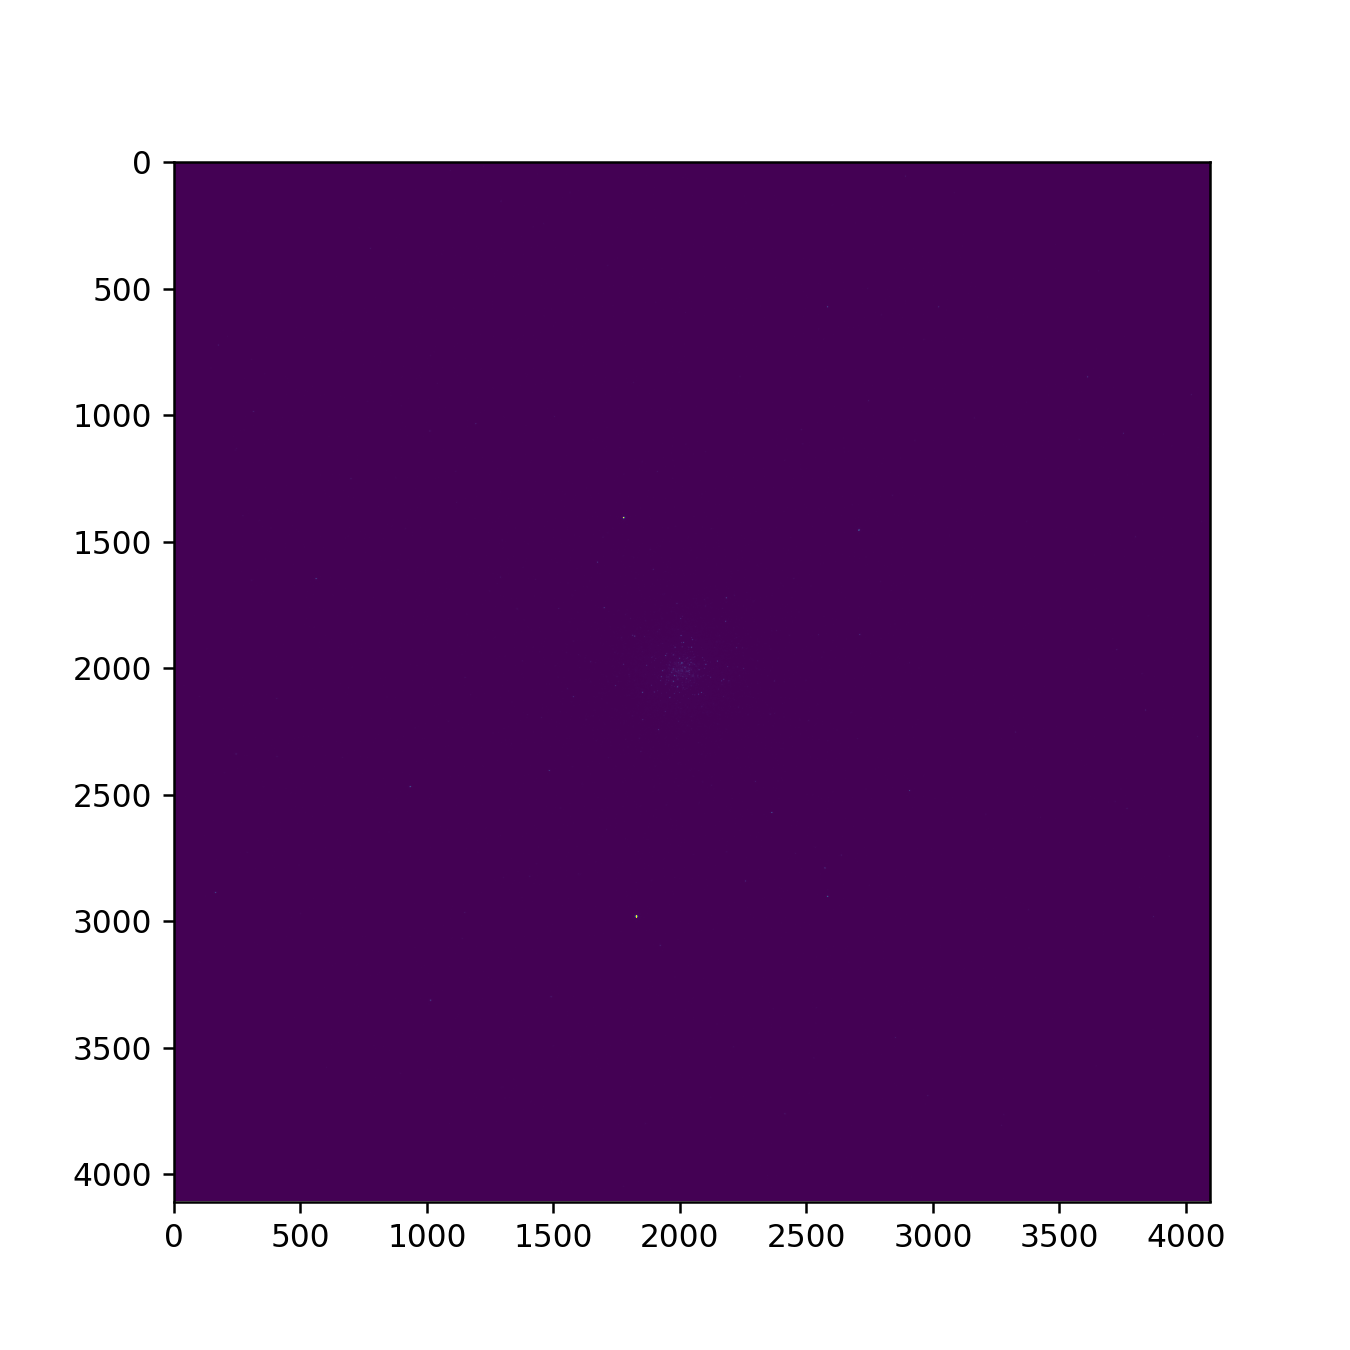

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(m3_data)
plt.show()

In [9]:
mean, median, std = sigma_clipped_stats(m3_data)

<IPython.core.display.Javascript object>


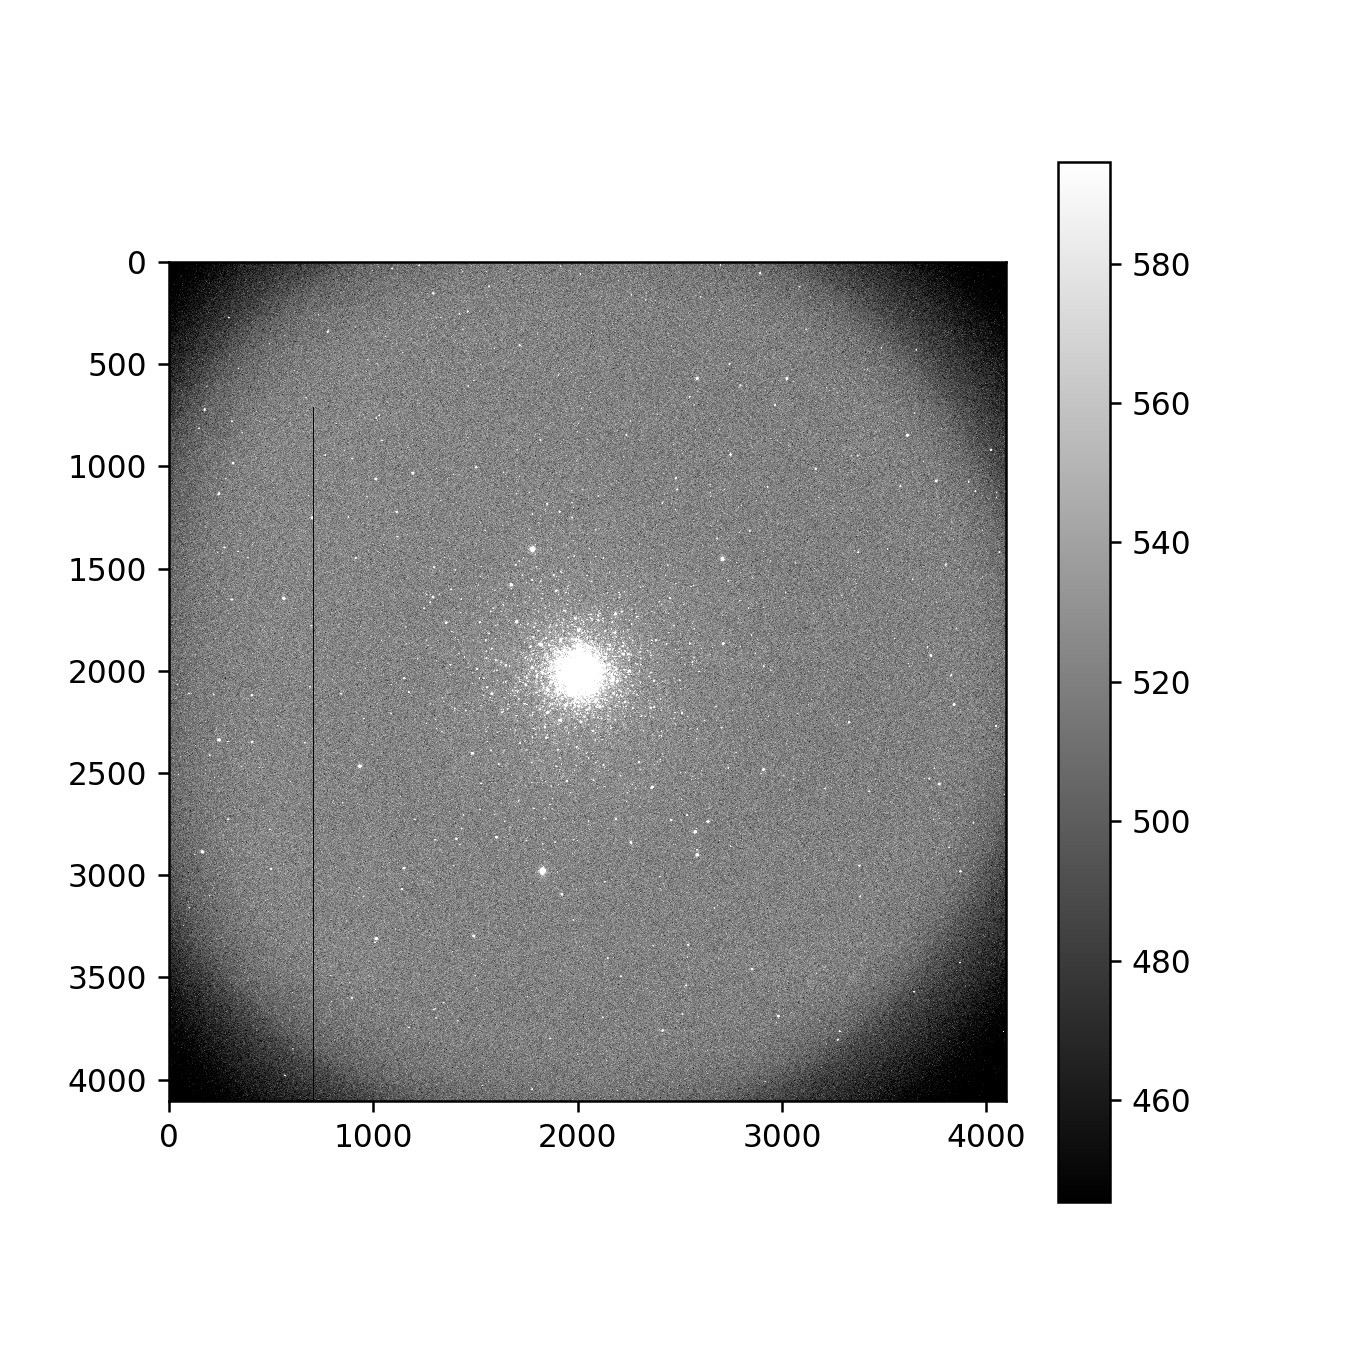

In [10]:
plt.figure(figsize=(6,6))

# set the scale of the image based on its statistics
# any pixel above vmax will show up with the same color as vmax. And vice-versa for vmin
plt.imshow(m3_data, vmin = median - 5*std, vmax = median + 5*std, cmap='gray')
plt.colorbar()

<IPython.core.display.Javascript object>


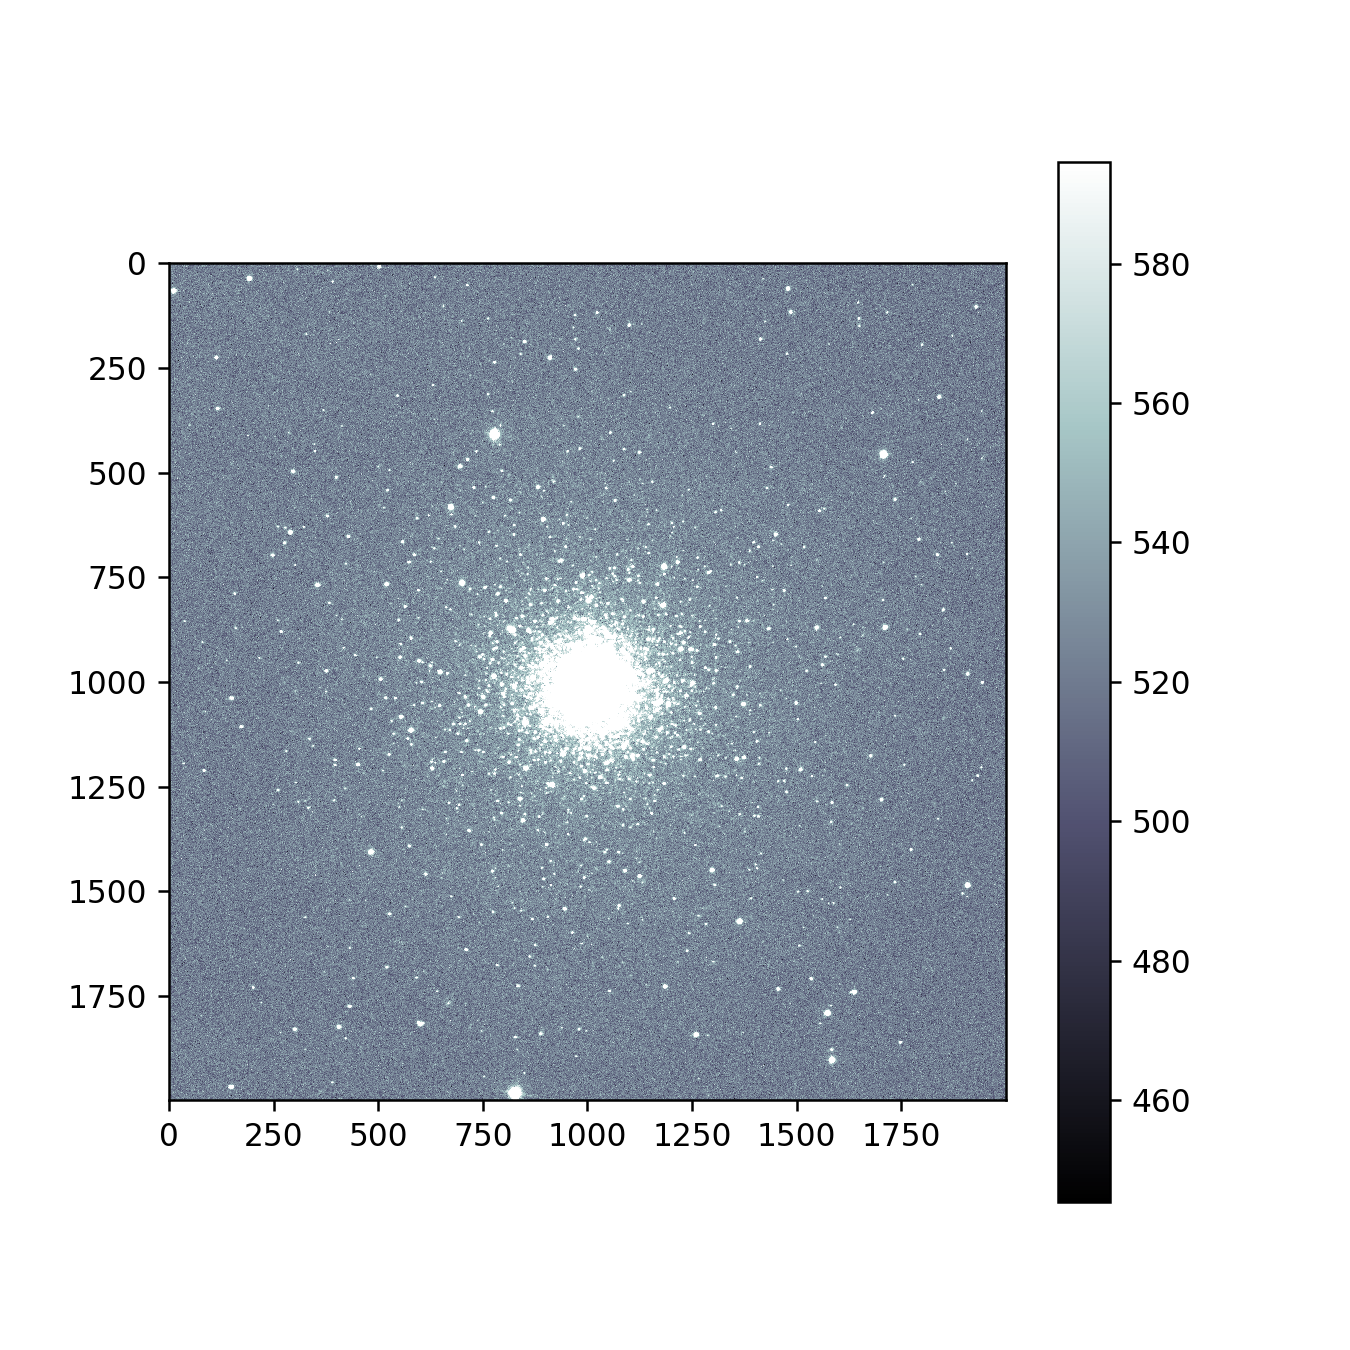

In [18]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data[1000:3000,1000:3000], vmin = median - 5*std, vmax = median + 5*std , cmap='bone')
plt.colorbar()

<IPython.core.display.Javascript object>


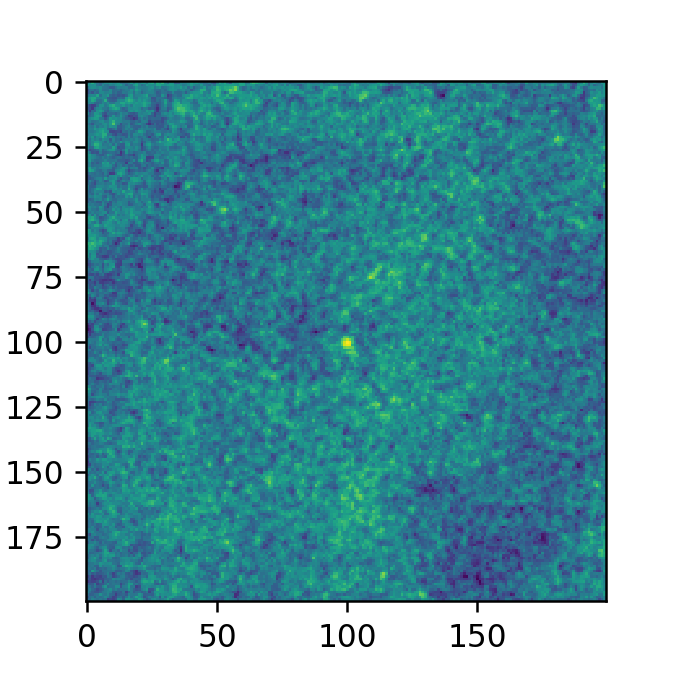

In [37]:
 from astropy.io import fits
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats
im0 = fits.open('image0.fits')
#im0.info()
im0_data=im0[0].data
#im0_data
plt.figure(figsize=(3,3))
plt.imshow(im0_data)
plt.show()

In [20]:
mean, median, std = sigma_clipped_stats(im0_data)

<IPython.core.display.Javascript object>


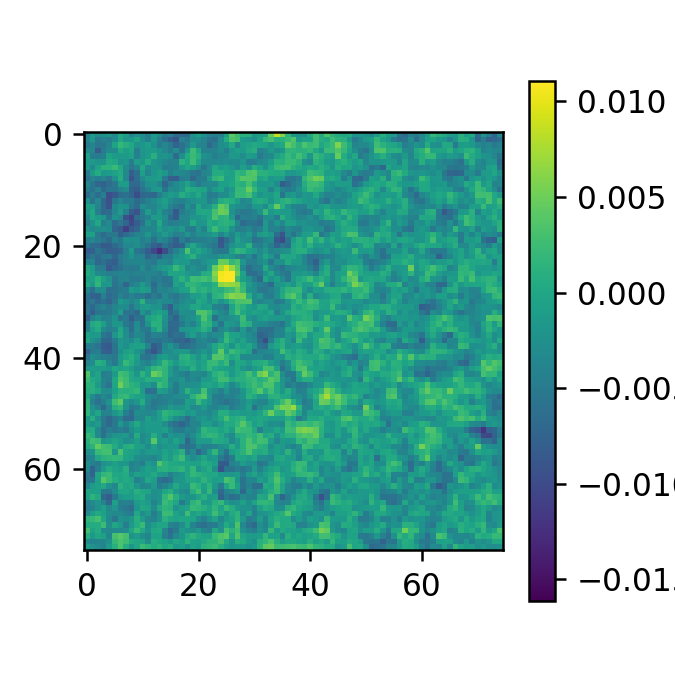

In [36]:
plt.figure(figsize=(3,3))

# set the scale of the image based on its statistics
# any pixel above vmax will show up with the same color as vmax. And vice-versa for vmin
plt.imshow(im0_data[75:150,75:150], vmin = median - 5*std, vmax = median + 5*std)
plt.colorbar()

<IPython.core.display.Javascript object>


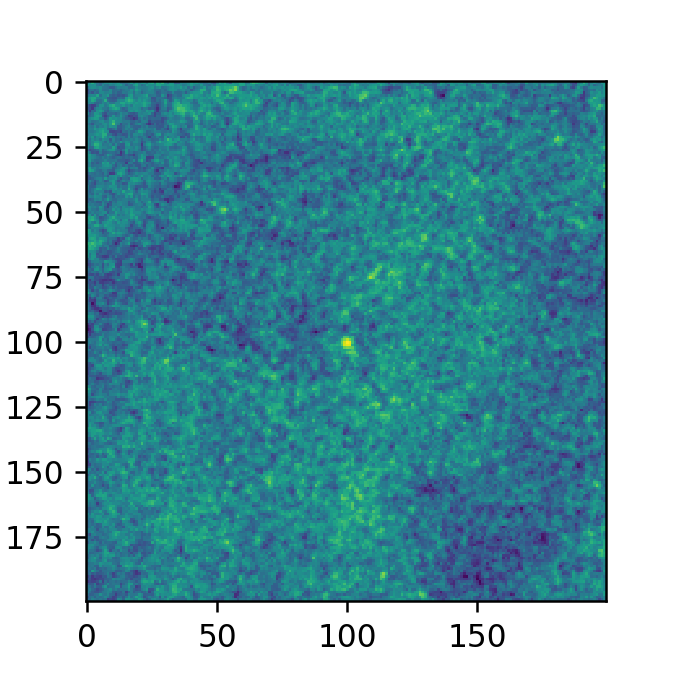

In [38]:
im3 = fits.open('image3.fits')
#im1.info()
im3_data=im0[0].data
#im1_data
plt.figure(figsize=(3,3))
plt.imshow(im3_data)
plt.show()

In [41]:
from astropy.io import fits
import numpy as np

def mean_fits(files):
  n = len(files)
  if n > 0:
    
    hdulist = fits.open(files[0])
    data = hdulist[0].data
    hdulist.close()
    
    for i in range(1, n):
      hdulist = fits.open(files[i])
      data += hdulist[0].data
      hdulist.close()
    
    mean = data / n
    return mean

files=['image0.fits','image1.fits','image2.fits','image3.fits']
mean=mean_fits(files)

import matplotlib.pyplot as plt

plt.imshow(mean, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()